In [1]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix, precision_recall_fscore_support
from GMMBayesClassifier import GMMBayesClassifier
import os
import matplotlib.pyplot as plt


In [2]:
def load_features(directory, feature_type='bovw'):
    features = []
    for file in os.listdir(directory):
        if file.endswith(f'_{feature_type}.npy'):
            feature_path = os.path.join(directory, file)
            feature = np.load(feature_path)
            features.append(feature)
    return np.array(features)

In [3]:
def load_labels_from_dirs(dirs):
    labels = []
    for i, dir_path in enumerate(dirs):
        num_files = len(os.listdir(dir_path))  
        labels.extend([i] * num_files)  
    return np.array(labels)

In [4]:
train_dirs = [
    'output/bayou/train',
    'output/desert_vegetation/train',
    'output/music_store/train'
]
test_dirs = [
    'output/bayou/test',
    'output/desert_vegetation/test',
    'output/music_store/test'
]

X_train_list = [load_features(dir_path, feature_type='bovw') for dir_path in train_dirs]
y_train = load_labels_from_dirs(train_dirs)

X_test_list = [load_features(dir_path, feature_type='bovw') for dir_path in test_dirs]
y_test = load_labels_from_dirs(test_dirs)

X_train_combined = np.vstack(X_train_list)
X_test_combined = np.vstack(X_test_list)

n_components_list = [1,2,4,8,32]

classifier = GMMBayesClassifier(n_components_list)

result,gmms,logLiklihood=classifier.fit_and_predict(X_train_combined,y_train,X_test_combined)


Evaluating GMM with 1 mixtures...
Evaluating GMM with 2 mixtures...
Evaluating GMM with 4 mixtures...
Evaluating GMM with 8 mixtures...
Evaluating GMM with 32 mixtures...


In [5]:
for n_components, y_pred in result.items():
    acc = accuracy_score(y_test, y_pred)
    print(f" Number of mixtures: {n_components}, Accuracy: {acc:.4f}")

for n_components, y_pred in result.items():
    metrics = classifier.evaluate_metrics(y_test, y_pred)
    print(f"Number of mixtures: {n_components}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision (per class): {metrics['precision']}")
    print(f"  Mean Precision: {metrics['mean_precision']:.4f}")
    print(f"  Recall (per class): {metrics['recall']}")
    print(f"  Mean Recall: {metrics['mean_recall']:.4f}")
    print(f"  F1 Score (per class): {metrics['f1']}")
    print(f"  Mean F1 Score: {metrics['mean_f1']:.4f}")

 Number of mixtures: 1, Accuracy: 0.6933
 Number of mixtures: 2, Accuracy: 0.6067
 Number of mixtures: 4, Accuracy: 0.6600
 Number of mixtures: 8, Accuracy: 0.7000
 Number of mixtures: 32, Accuracy: 0.7533
Number of mixtures: 1
  Accuracy: 0.6933
  Precision (per class): [0.65909091 0.66666667 0.76744186]
  Mean Precision: 0.6977
  Recall (per class): [0.58 0.84 0.66]
  Mean Recall: 0.6933
  F1 Score (per class): [0.61702128 0.74336283 0.70967742]
  Mean F1 Score: 0.6900
Number of mixtures: 2
  Accuracy: 0.6067
  Precision (per class): [0.8        0.54022989 0.68965517]
  Mean Precision: 0.6766
  Recall (per class): [0.08 0.94 0.8 ]
  Mean Recall: 0.6067
  F1 Score (per class): [0.14545455 0.68613139 0.74074074]
  Mean F1 Score: 0.5241
Number of mixtures: 4
  Accuracy: 0.6600
  Precision (per class): [1.         0.60526316 0.671875  ]
  Mean Precision: 0.7590
  Recall (per class): [0.2  0.92 0.86]
  Mean Recall: 0.6600
  F1 Score (per class): [0.33333333 0.73015873 0.75438596]
  Mean F

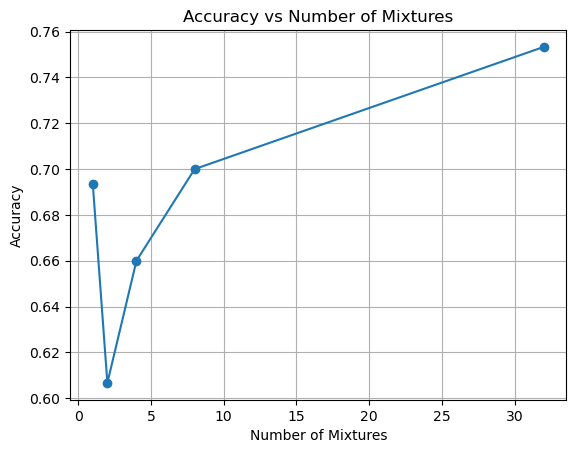

In [6]:
accuracies = [accuracy_score(y_test, y_pred) for y_pred in result.values()]
plt.plot(n_components_list, accuracies, marker='o')
plt.title('Accuracy vs Number of Mixtures')
plt.xlabel('Number of Mixtures')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [7]:
for n_components, gmms_per_class in gmms.items():
    for c, gmm in gmms_per_class.items():
        print(f"GMM log-likelihood for {n_components} mixtures, class {c}: {gmm.lower_bound_}")


GMM log-likelihood for 1 mixtures, class 0: 74.3304408988109
GMM log-likelihood for 1 mixtures, class 1: 65.70207270360397
GMM log-likelihood for 1 mixtures, class 2: 98.9126043517749
GMM log-likelihood for 2 mixtures, class 0: 99.95729446368674
GMM log-likelihood for 2 mixtures, class 1: 88.4290165712076
GMM log-likelihood for 2 mixtures, class 2: 107.06786052260644
GMM log-likelihood for 4 mixtures, class 0: 130.28934327970433
GMM log-likelihood for 4 mixtures, class 1: 112.55289126633508
GMM log-likelihood for 4 mixtures, class 2: 133.61717514201698
GMM log-likelihood for 8 mixtures, class 0: 152.78269034577767
GMM log-likelihood for 8 mixtures, class 1: 154.30426614107736
GMM log-likelihood for 8 mixtures, class 2: 160.91489030226532
GMM log-likelihood for 32 mixtures, class 0: 183.5685700744021
GMM log-likelihood for 32 mixtures, class 1: 182.81780646522733
GMM log-likelihood for 32 mixtures, class 2: 182.90132294220578


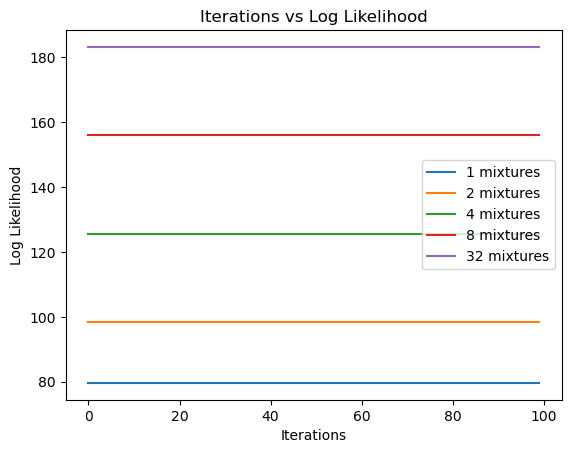

In [8]:
plotGMMData= {n_components: gmm[0] for n_components, gmm in gmms.items()}

classifier.plot_log_likelihood(logLiklihood)

Confusion Matrix for 1 mixtures:


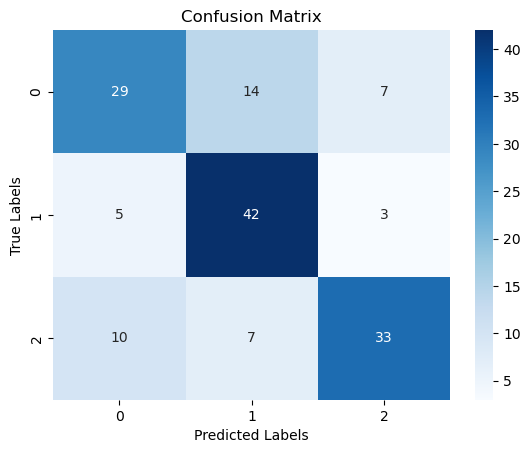

Confusion Matrix for 2 mixtures:


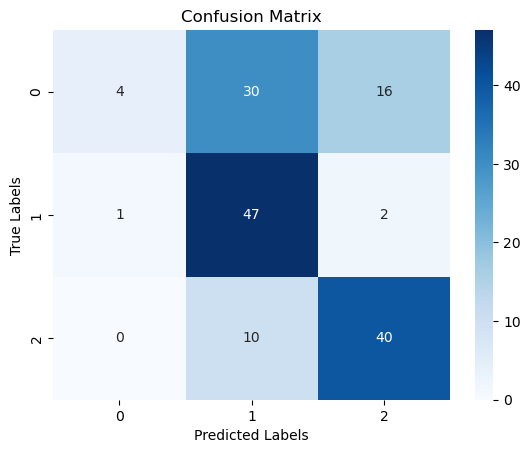

Confusion Matrix for 4 mixtures:


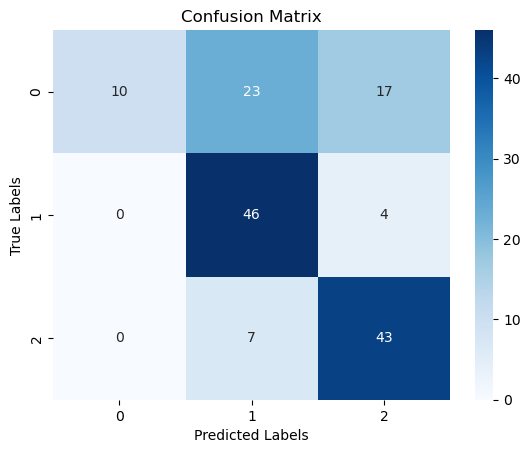

Confusion Matrix for 8 mixtures:


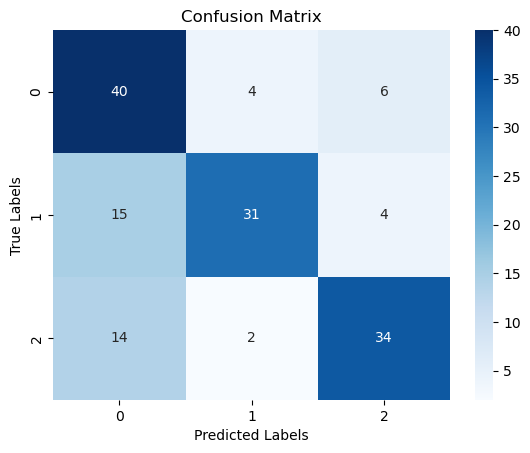

Confusion Matrix for 32 mixtures:


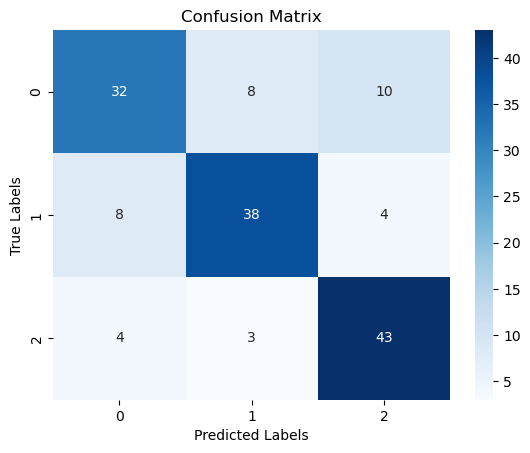

In [9]:
for n_components, y_pred in result.items():
    print(f"Confusion Matrix for {n_components} mixtures:")
    classifier.plot_confusion_matrix(y_test, y_pred)